# 1. Business Understanding

## 1.1 Problem Statement
**Business Context**
Agriculture remains a key economic sector in many African countries, especially in Kenya and across sub-Saharan Africa, where it employs over 60% of the population and contributes significantly to GDP. However, pest and disease outbreaks in staple crops like tomato, maize, and onion cause substantial yield losses — often up to 40% or more — affecting food security, farmer incomes, and market stability. These losses often go undetected until it's too late, especially among smallholder farmers who may lack access to timely agronomic advice or diagnostics. The TOM2024 dataset was developed to tackle this challenge through data-driven innovation, empowering stakeholders with accurate, scalable tools for crop health monitoring.

**Problem:**
Small holder farmers often lack:
- Timely diagnosis of plant diseases
- Access to expert advice or affordable treatment
- Scalable, easy-to-use tools

---

## 1.2 Objectives
**Main Goal**
Build an AI-powered system that detects crop diseases and provides relevant treatment recommendations.

**Specific Objectives:**
1. Collect and clean image + metadata of crops (healthy and diseased)
2. Train an ML/DL model to identify crop diseases
3. Develop a recommendation engine for treatment and prevention
4. Build a user-friendly platform for farmers to interact with the system.
5. Demonstrate potential impact on yield, cost saving and power empowerment.

---

## 1.3 Metrics of Success
To evaluate the effectiveness and impact of the system:

### Model Performance
- **Accuracy, Precision, Recall, and F1-score** of the disease prediction model
- **Confusion matrix** to assess misclassification of disease types
- **Model latency** (how fast predictions are returned)

### Usability & Adoption
- **Adoption rate** among smallholder farmers
- **Task success rate** (successful image uploads and predictions)

---

## 1.4 External Relevance & Risk Factors
Key external elements that could affect success:

### Data Challenges
- Limited or low-quality labeled datasets
- Variations in disease appearance across regions

### Infrastructure & Access
- Poor rural internet or electricity
- Limited access to recommended agrovet products

### Policy & Ethics
- Data privacy concerns (image uploads)
- Government or regulatory compliance

### Environmental Factors
- Seasonal disease variations
- Climate change influencing disease patterns

# 2. Data Understanding

The success of the crop disease prediction system relies heavily on the quality and diversity of the data used to train and evaluate the models. This section outlines the dataset being used—**TOM2024**—and its relevance, structure, and characteristics.

## 2.1 Dataset Overview

The **TOM2024 dataset** is a comprehensive agricultural dataset that contains:

- **Total images**: 25,844 raw images  
- **Labeled images**: 12,227 expert-labeled images  
- **Crop types**: Tomato, Maize, Onion  
- **Classes**: 30 classes covering pests and diseases  
- **Image resolution**: High-quality images captured under varied environmental conditions

This dataset is especially valuable for building machine learning and deep learning models for plant health diagnostics, enabling early detection and informed responses to crop threats.

## 2.2 Purpose and Value

- Facilitates **early and accurate pest/disease identification**
- Supports **precision agriculture** and **reduced pesticide use**
- Enables **regionally adaptable AI models**
- Usable for **education**, **extension services**, and **digital agriculture tools**

## 2.3 Data Structure

| Field/Aspect         | Description |
|----------------------|-------------|
| `image`              | High-resolution image of plant leaf or crop symptom |
| `crop_type`          | Categorical: tomato, maize, onion |
| `issue_type`         | Categorical: pest or disease |
| `class_label`        | Specific pest/disease (30 classes) |
| `environment_context`| Field conditions, lighting, background elements |
| `expert_verified`    | Boolean: whether image has been validated by an expert |

## 2.4 Data Collection Methodology

The dataset was curated using a systematic approach:

1. **Site Selection** – Representative agricultural areas chosen
2. **Image Acquisition** – Raw images collected in-field using mobile devices
3. **Image Grouping** – By crop type and visible issue (pest/disease)
4. **Issue Identification** – Initial tagging by field experts
5. **Image Cropping/Resizing** – For consistency and model-readiness
6. **Expert Validation** – Cropped images verified by trained agronomists
7. **Storage and Structuring** – Organized for easy access by researchers

## 2.5 Data Quality & Variability

- Images captured in **diverse lighting, backgrounds, and leaf stages**
- **Label imbalance** may exist across certain pests/diseases
- High **label accuracy** due to expert validation
- **Realistic variation** in field conditions enhances model robustness

## 2.6 Dataset Directory Structure

The TOM2024 dataset is divided into two main categories, each with a unique structure that supports different stages of model development.

---

### 📁 Category A – Raw Labeled Collections

This category consists of image folders grouped by **crop type** and **issue type** (pests, diseases, or pest activities). It serves as the initial labeled dataset for exploration, augmentation, or additional curation.

---

Each subfolder contains images representing a specific pest, disease, or activity affecting the respective crop. These images are labeled and may vary in lighting, background, and clarity to simulate real-world field conditions.

---

### 📁 Category B – Train/Test Data for Model Training

Category B is structured to support supervised machine learning and deep learning model training. Each crop folder contains `train` and `test` subfolders, and within those are class folders labeled according to the condition:

- **`_d`** → Disease  
- **`_p`** → Pest  
- **`_a`** → Pest Activity (maize only)  
- A separate folder for **healthy** plants is included in each case.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = '/content/drive/My Drive/Data.zip'

In [3]:
import zipfile
import os

extract_path = '/content/crop_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
# importing necessary libraries
import re
import hashlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import shutil
import cv2
import seaborn as sns
from PIL import Image, UnidentifiedImageError

### Loading and exploring the Dataset

In [5]:
dataset_path = '/content/crop_dataset/Data'

In [6]:
# Exploring subfolders within "Category A" or "Category B"
category_a_path = os.path.join(dataset_path, 'CATEGORY_A')
category_b_path = os.path.join(dataset_path, 'CATEGORY_B')

# Checking the subfolders in Category A (Maize diseases as an example)
maize_diseases_path = os.path.join(category_a_path, 'maize_diseases')
disease_folders = os.listdir(maize_diseases_path)
print("\nDisease categories in Maize:", disease_folders)


Disease categories in Maize: ['Rust-D', 'Abiotic_disease-D', 'Curvularia-D', 'Virosis-D', 'Healthy_leaf', 'Stripe-D', 'Helminthosporiosis-D']


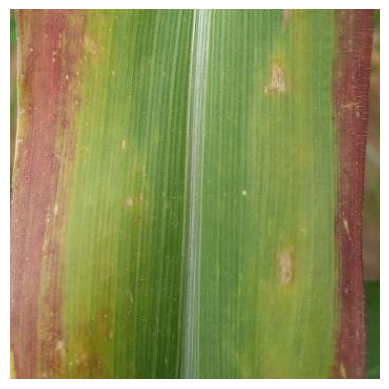

In [7]:
# Loading and display sample images from the "Maize" disease categories
def display_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Displaying a sample image from "Abiotic_disease-D" folder
sample_image_path = os.path.join(maize_diseases_path, 'Abiotic_disease-D', os.listdir(os.path.join(maize_diseases_path, 'Abiotic_disease-D'))[0])
display_image(sample_image_path)

### Counting images in all categories and subfolders

In [8]:

# Function to count images in all categories and subfolders
def count_images_in_folders(path):
    image_counts = {}

    # Walk through the folder and subfolders
    for root, dirs, files in os.walk(path):
        # Filter out non-image files (you can adjust the file extensions if needed)
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

        # Count the number of images in each folder
        if image_files:
            folder_name = os.path.relpath(root, path)  # Get relative path from the root folder
            image_counts[folder_name] = len(image_files)

    return image_counts

# Count images in Category A and Category B
category_a_path = '/content/crop_dataset/Data/CATEGORY_A'
category_b_path = '/content/crop_dataset/Data/CATEGORY_B'

category_a_image_counts = count_images_in_folders(category_a_path)
category_b_image_counts = count_images_in_folders(category_b_path)

# Combine the counts from both categories
all_image_counts = {**category_a_image_counts, **category_b_image_counts}

# Display the results
print("Total image counts in all categories and subfolders:")
for category, count in all_image_counts.items():
    print(f"{category}: {count} images")


Total image counts in all categories and subfolders:
tomato_pests/tuta_absoluta_p: 19 images
tomato_pests/helicoverpa_armigera_p: 278 images
maize_pests_activities/Spodotera_frugiperda- A: 616 images
maize_diseases/Rust-D: 99 images
maize_diseases/Abiotic_disease-D: 77 images
maize_diseases/Curvularia-D: 259 images
maize_diseases/Virosis-D: 148 images
maize_diseases/Healthy_leaf: 585 images
maize_diseases/Stripe-D: 2190 images
maize_diseases/Helminthosporiosis-D: 159 images
maize_pests/Aphids-P: 4 images
maize_pests/Spodoptera_frugiperda-P: 600 images
onion_diseases/Fusarium-D: 738 images
onion_diseases/Virosis-D: 203 images
onion_diseases/Bulb_blight-D: 30 images
onion_diseases/Alternaria_D: 515 images
onion_diseases/Healthy_leaf: 679 images
onion_pests/Caterpillar-P: 879 images
tomato_diseases/exces_nitrogen_d: 43 images
tomato_diseases/alternaria_d: 322 images
tomato_diseases/tomato_late_blight_d: 74 images
tomato_diseases/Blossom_end_rot_d: 118 images
tomato_diseases/Bacterial_flou

#### **Based on category A, these are counts for each subfolders**


#### **Onion Diseases:**

  - Healthy Leaf: 679 images

  - Fusarium-D: 738 images

- Virosis-D: 203 images

- Bulb Blight-D: 30 images

- Alternaria-D: 515 images

#### **Onion Pests:**

- Caterpillar-P: 879 images

#### **Maize Pests:**

- Spodoptera frugiperda-A: 616 images

- Aphids-P: 4 images

- Spodoptera frugiperda-P: 610 images

#### **Maize Diseases:**

- Virosis-D: 148 images

- Stripe-D: 2,190 images

- Helminthosporiosis-D: 159 images

- Healthy Leaf: 585 images

- Rust-D: 99 images

- Abiotic Disease-D: 77 images

- Curvularia-D: 259 images

#### **Tomato Pests:**

- Helicoverpa armigera-P: 278 images

- Tuta Absoluta-P: 19 images

#### **Tomato Diseases:**

- Virosis-D: 1,542 images

- Sunburn-D: 51 images

- Tomato Late Blight-D: 74 images

- Healthy Fruit: 552 images

- Healthy Leaf: 782 images

#### **Mite-D: 390 images:**

- Excess Nitrogen-D: 43 images

- Blossom End Rot-D: 118 images

- Bacterial Floundering-D: 252 images

- Fusarium-D: 18 images

- Alternaria-D: 322 images

- Alternaria Mite-D: 8 images

### **Based on category B, these are counts for each subfolders**

#### **Onion with Data Augmentation (Training):**

- Healthy Leaf: 4,400 images

- Virosis-D: 1,016 images

- Fusarium-D: 4,400 images

- Caterpillars-P: 4,408 images

- Bulb Blight-D: 934 images

- Alternaria-D: 4,398 images

#### **Onion with Data Augmentation (Testing):**

- Alternaria-D: 630 images

- Caterpillars-P: 1,358 images

- Bulb Blight-D: 380 images

- Fusarium-D: 1,076 images

- Virosis-D: 412 images

- Healthy Leaf: 958 images

#### **Maize with Data Augmentation (Training):**

- Stripe-D: 2,200 images

- Spodoptera frugiperda-P: 2,200 images

- Spodoptera frugiperda: 2,200 images

- Healthy Leaf: 2,200 images

- Helminthosporiosis-D: 2,200 images

- Rust-D: 1,298 images

- Abiotic Diseases-D: 770 images

- Curvulariosis-D: 2,200 images

- Aphids-P: 440 images

#### **Maize with Data Augmentation (Testing):**

- Stripe-D: 4,278 images

- Spodoptera frugiperda-P: 1,000 images

- Rust-D: 80 images

- Spodoptera frugiperda-A: 1,032 images

- Abiotic Diseases-D: 120 images

- Helminthosporiosis-D: 177 images

- Aphids-P: 60 images

- Healthy Leaf: 1,119 images

- Curvulariosis-D: 477 images

#### **Tomato with Data Augmentation (Testing):**

- Virosis-D: 2,884 images

- Tomato Late Blight-D: 238 images

- Tuta Absoluta-P: 274 images

- Excess Nitrogen-D: 230 images

- Mite-P: 580 images

- Sunburn-D: 238 images

- Fusarium-D: 232 images

- Blossom End Rot: 272 images

- Healthy Leaf: 904 images

- Healthy Leaf (another folder): 1,363 images

- Alternaria Mite-D: 119 images

- Bacterial Floundering-D: 304 images

- Helicoverpa armigera-P: 356 images

- Alternaria-D: 444 images

#### **Tomato with Data Augmentation (Training):**

- Helicoverpa armigera-P: 2,200 images

- Tomato Late Blight: 1,100 images

- Sunburn-D: 1,108 images

- Excess Nitrogen-D: 1,100 images

- Tuta Absoluta-P: 137 images

- Mite-D: 1,946 images

- Virosis-D: 1,449 images

- Healthy Leaf: 2,210 images

- Healthy Fruit: 2,200 images

- Fusarium-D: 2,200 images

- Blossom End Rot-D: 1,342 images

- Alternaria Mite-D: 2,200 images

- Bacterial Floundering-D: 3,364 images

- Alternaria-D: 2,200 images

### **Visual presentation of the above information**

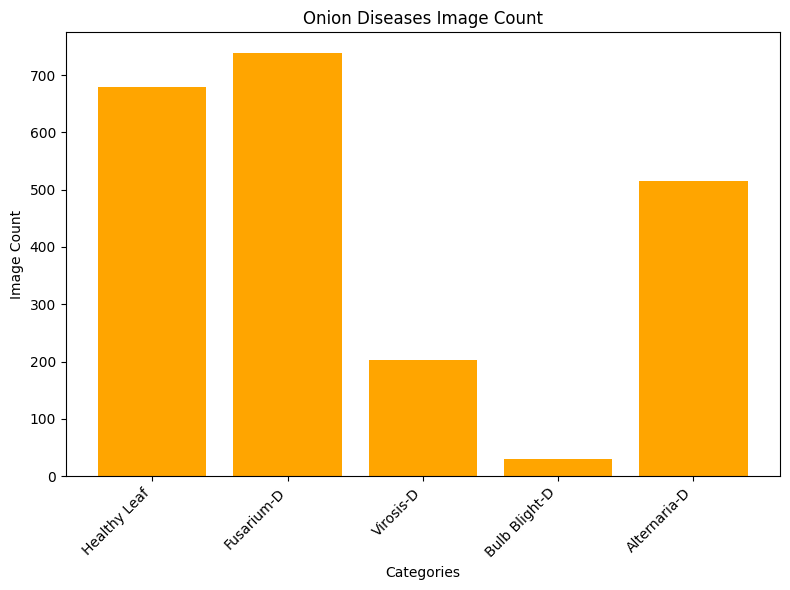

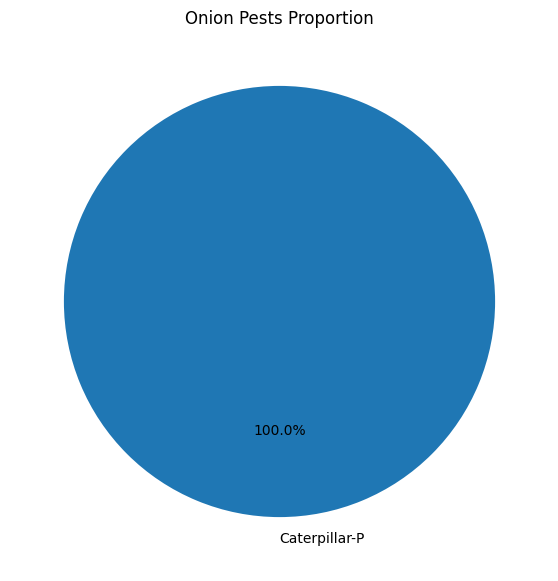

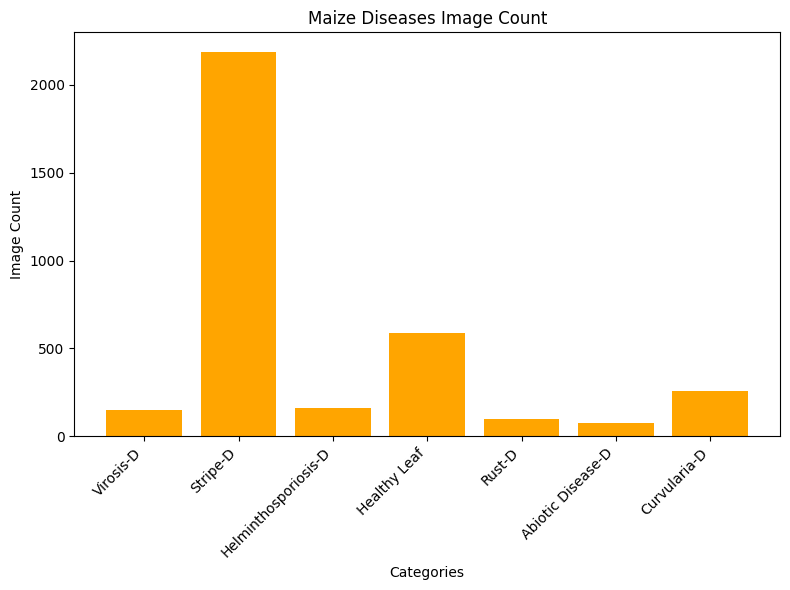

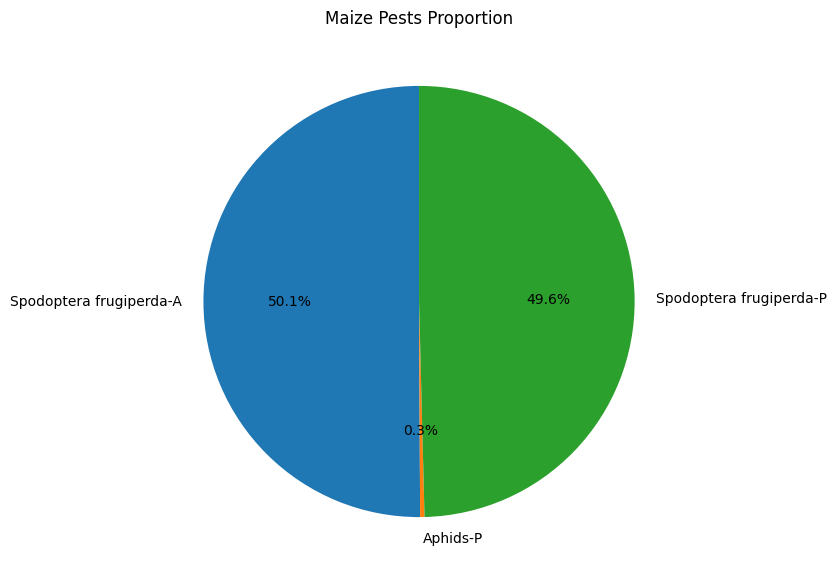

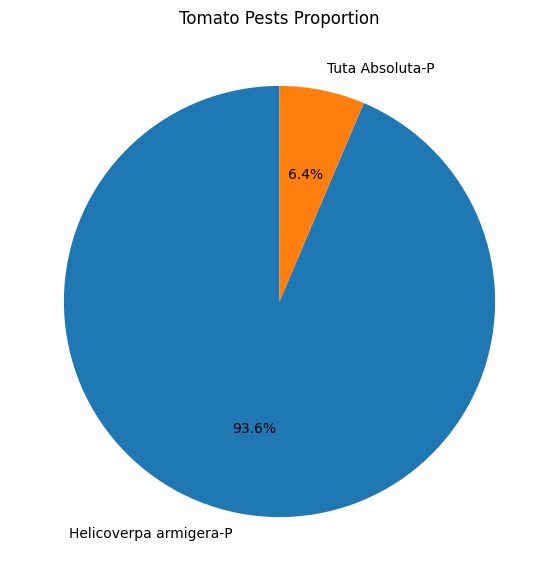

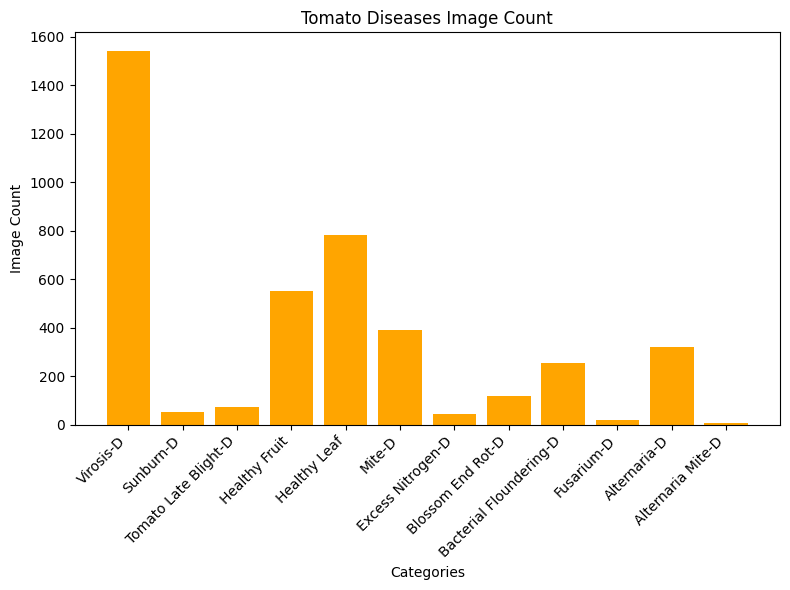

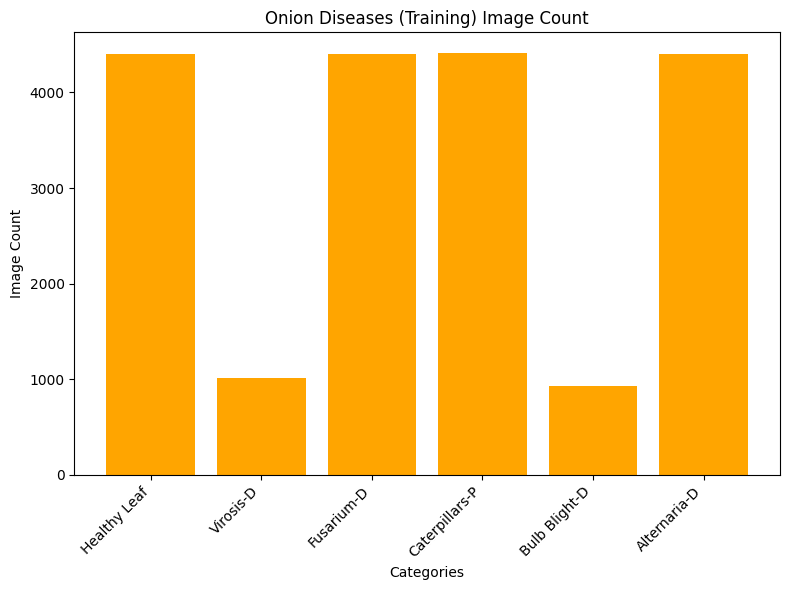

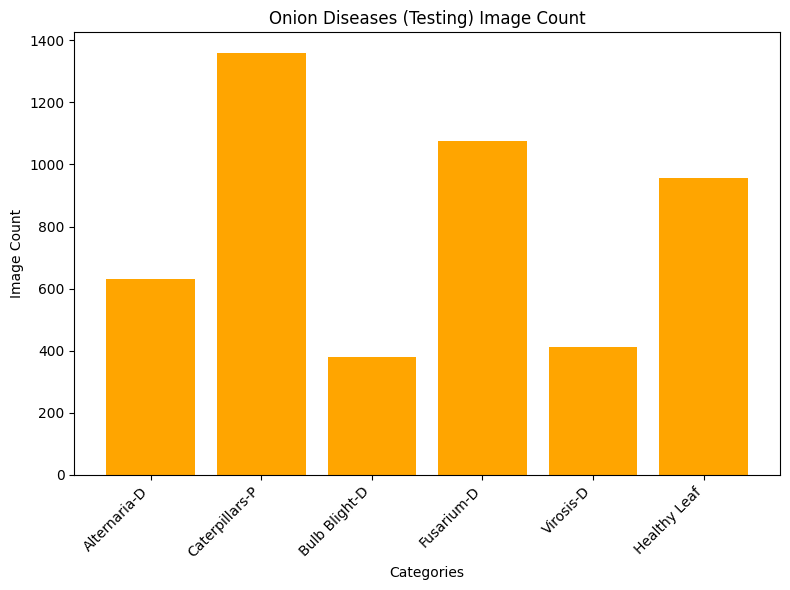

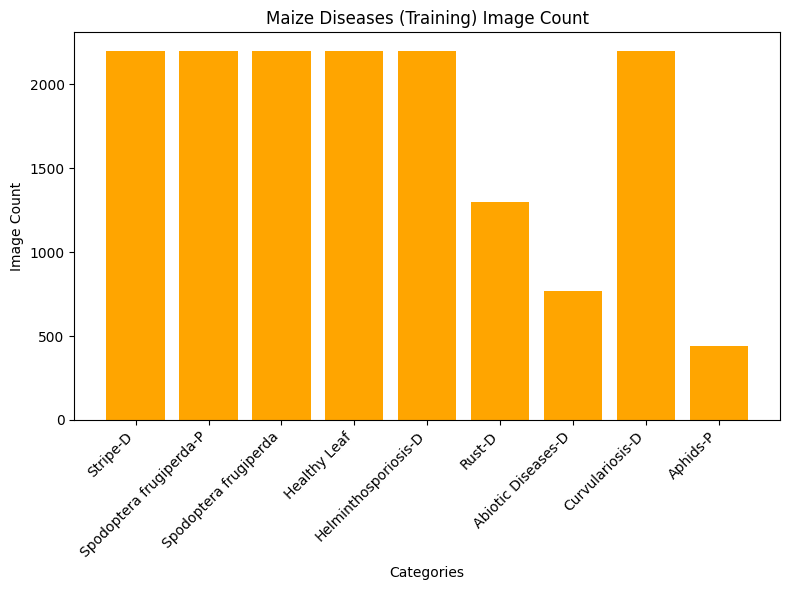

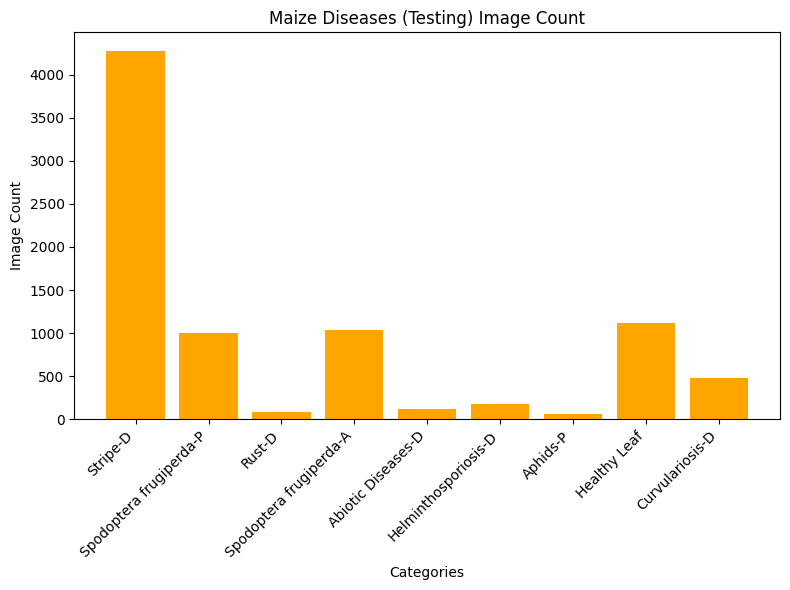

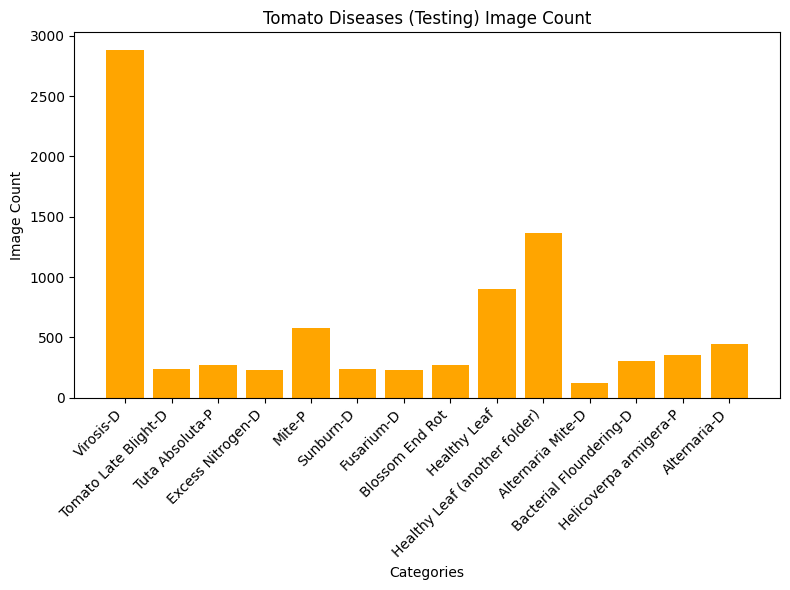

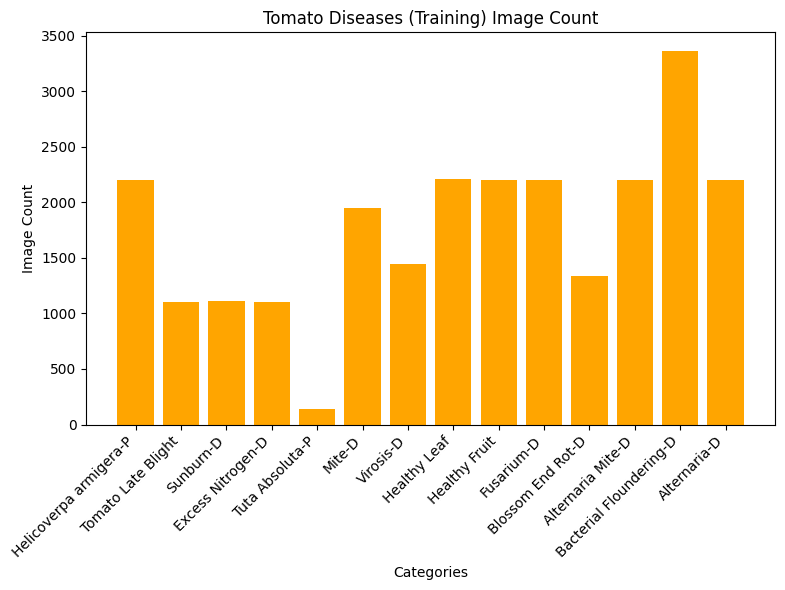

In [9]:
#Visual presentation of the above information

# Data for Category A subfolders
onion_diseases_A = {
    "Healthy Leaf": 679,
    "Fusarium-D": 738,
    "Virosis-D": 203,
    "Bulb Blight-D": 30,
    "Alternaria-D": 515
}

onion_pests_A = {
    "Caterpillar-P": 879
}

maize_pests_A = {
    "Spodoptera frugiperda-A": 616,
    "Aphids-P": 4,
    "Spodoptera frugiperda-P": 610
}

maize_diseases_A = {
    "Virosis-D": 148,
    "Stripe-D": 2190,
    "Helminthosporiosis-D": 159,
    "Healthy Leaf": 585,
    "Rust-D": 99,
    "Abiotic Disease-D": 77,
    "Curvularia-D": 259
}

tomato_pests_A = {
    "Helicoverpa armigera-P": 278,
    "Tuta Absoluta-P": 19
}

tomato_diseases_A = {
    "Virosis-D": 1542,
    "Sunburn-D": 51,
    "Tomato Late Blight-D": 74,
    "Healthy Fruit": 552,
    "Healthy Leaf": 782,
    "Mite-D": 390,
    "Excess Nitrogen-D": 43,
    "Blossom End Rot-D": 118,
    "Bacterial Floundering-D": 252,
    "Fusarium-D": 18,
    "Alternaria-D": 322,
    "Alternaria Mite-D": 8
}

# Data for Category B subfolders (with data augmentation)
onion_diseases_B_train = {
    "Healthy Leaf": 4400,
    "Virosis-D": 1016,
    "Fusarium-D": 4400,
    "Caterpillars-P": 4408,
    "Bulb Blight-D": 934,
    "Alternaria-D": 4398
}

onion_diseases_B_test = {
    "Alternaria-D": 630,
    "Caterpillars-P": 1358,
    "Bulb Blight-D": 380,
    "Fusarium-D": 1076,
    "Virosis-D": 412,
    "Healthy Leaf": 958
}

maize_diseases_B_train = {
    "Stripe-D": 2200,
    "Spodoptera frugiperda-P": 2200,
    "Spodoptera frugiperda": 2200,
    "Healthy Leaf": 2200,
    "Helminthosporiosis-D": 2200,
    "Rust-D": 1298,
    "Abiotic Diseases-D": 770,
    "Curvulariosis-D": 2200,
    "Aphids-P": 440
}

maize_diseases_B_test = {
    "Stripe-D": 4278,
    "Spodoptera frugiperda-P": 1000,
    "Rust-D": 80,
    "Spodoptera frugiperda-A": 1032,
    "Abiotic Diseases-D": 120,
    "Helminthosporiosis-D": 177,
    "Aphids-P": 60,
    "Healthy Leaf": 1119,
    "Curvulariosis-D": 477
}

tomato_diseases_B_test = {
    "Virosis-D": 2884,
    "Tomato Late Blight-D": 238,
    "Tuta Absoluta-P": 274,
    "Excess Nitrogen-D": 230,
    "Mite-P": 580,
    "Sunburn-D": 238,
    "Fusarium-D": 232,
    "Blossom End Rot": 272,
    "Healthy Leaf": 904,
    "Healthy Leaf (another folder)": 1363,
    "Alternaria Mite-D": 119,
    "Bacterial Floundering-D": 304,
    "Helicoverpa armigera-P": 356,
    "Alternaria-D": 444
}

tomato_diseases_B_train = {
    "Helicoverpa armigera-P": 2200,
    "Tomato Late Blight": 1100,
    "Sunburn-D": 1108,
    "Excess Nitrogen-D": 1100,
    "Tuta Absoluta-P": 137,
    "Mite-D": 1946,
    "Virosis-D": 1449,
    "Healthy Leaf": 2210,
    "Healthy Fruit": 2200,
    "Fusarium-D": 2200,
    "Blossom End Rot-D": 1342,
    "Alternaria Mite-D": 2200,
    "Bacterial Floundering-D": 3364,
    "Alternaria-D": 2200
}

# Function to plot pie chart
def plot_pie_chart(data, title):
    plt.figure(figsize=(7, 7))
    plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

# Function to plot bar chart
def plot_bar_chart(data, title):
    plt.figure(figsize=(8, 6))
    plt.bar(data.keys(), data.values(), color='orange')
    plt.xlabel('Categories')
    plt.ylabel('Image Count')
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Visualizations for Category A
plot_bar_chart(onion_diseases_A, "Onion Diseases Image Count")
plot_pie_chart(onion_pests_A, "Onion Pests Proportion")
plot_bar_chart(maize_diseases_A, "Maize Diseases Image Count")
plot_pie_chart(maize_pests_A, "Maize Pests Proportion")
plot_pie_chart(tomato_pests_A, "Tomato Pests Proportion")
plot_bar_chart(tomato_diseases_A, "Tomato Diseases Image Count")

# Visualizations for Category B (with Data Augmentation)
plot_bar_chart(onion_diseases_B_train, "Onion Diseases (Training) Image Count")
plot_bar_chart(onion_diseases_B_test, "Onion Diseases (Testing) Image Count")
plot_bar_chart(maize_diseases_B_train, "Maize Diseases (Training) Image Count")
plot_bar_chart(maize_diseases_B_test, "Maize Diseases (Testing) Image Count")
plot_bar_chart(tomato_diseases_B_test, "Tomato Diseases (Testing) Image Count")
plot_bar_chart(tomato_diseases_B_train, "Tomato Diseases (Training) Image Count")

### Checking for Class imbalance

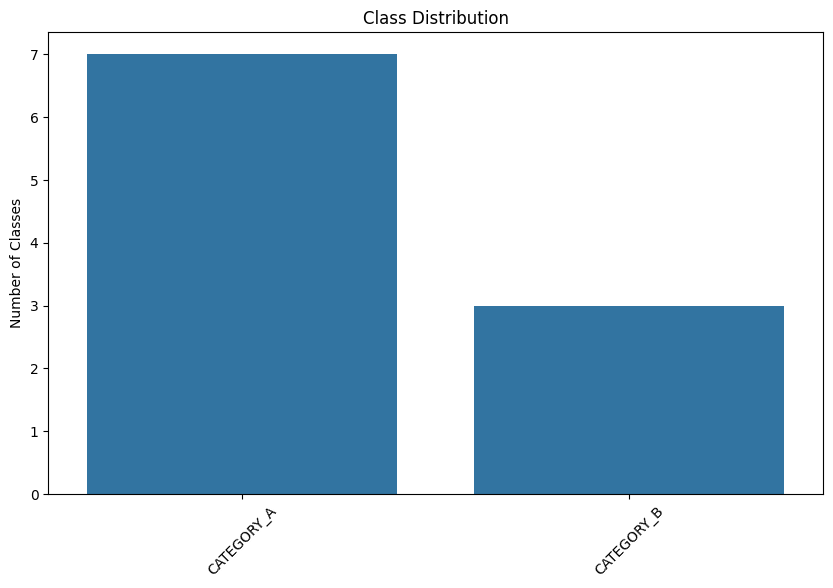

In [10]:
class_counts = {}
for cls in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, cls)
    if os.path.isdir(class_path):
        class_counts[cls] = len(os.listdir(class_path))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution")
plt.ylabel("Number of Classes")
plt.xticks(rotation=45)
plt.show()

# 3. Data Preparation
Before training the model, the dataset underwent several steps of cleaning, labeling, augmentation, and formatting to ensure it is suitable for machine learning tasks.

---

## 3.1 Data Cleaning

- Removing white spaces from folder names
- Channging all D and Ps to lower caps
- Removed duplicate or corrupted image files.
- Ensured consistent image formats (e.g., `.jpg`, `.png`) and resized images to a standard size (e.g., 224x224 pixels).
- Verified class labels for each folder based on metadata and visual inspection.
- Excluded low-quality or highly blurred images that could introduce noise into the model.
- removing Noisy Images

### 3.1.1 Handling the folder names

In [11]:
# Step 1: Replace hyphens with spaces
def replace_hyphens_with_spaces(root_dir):
    for root, dirs, files in os.walk(root_dir, topdown=False):
        for name in files:
            if '-' in name:
                old_path = os.path.join(root, name)
                new_name = name.replace('-', ' ')
                new_path = os.path.join(root, new_name)
                os.rename(old_path, new_path)
        for name in dirs:
            if '-' in name:
                old_path = os.path.join(root, name)
                new_name = name.replace('-', ' ')
                new_path = os.path.join(root, new_name)
                os.rename(old_path, new_path)

# Step 2: Replace spaces with underscores
def rename_all(root_dir):
    for root, dirs, files in os.walk(root_dir, topdown=False):
        for name in files:
            if ' ' in name:
                old_path = os.path.join(root, name)
                new_name = name.replace(' ', '_')
                new_path = os.path.join(root, new_name)
                os.rename(old_path, new_path)
        for name in dirs:
            if ' ' in name:
                old_path = os.path.join(root, name)
                new_name = name.replace(' ', '_')
                new_path = os.path.join(root, new_name)
                os.rename(old_path, new_path)

# Step 3: Collapse multiple underscores
def clean_names(root_dir):
    for root, dirs, files in os.walk(root_dir, topdown=False):
        for name in files:
            new_name = re.sub(r'_+', '_', name)
            if new_name != name:
                old_path = os.path.join(root, name)
                new_path = os.path.join(root, new_name)
                os.rename(old_path, new_path)
        for name in dirs:
            new_name = re.sub(r'_+', '_', name)
            if new_name != name:
                old_path = os.path.join(root, name)
                new_path = os.path.join(root, new_name)
                os.rename(old_path, new_path)

# Step 4: Fix diseases ending with D and pests ending with P (folder & file names)
def fix_disease_pest_labels(root_dir):
    for root, dirs, files in os.walk(root_dir, topdown=False):
        for name in files:
            name_wo_ext, ext = os.path.splitext(name)
            new_name_wo_ext = re.sub(r'(?<=\w)D$', 'd', name_wo_ext)
            new_name_wo_ext = re.sub(r'(?<=\w)P$', 'p', new_name_wo_ext)
            if new_name_wo_ext != name_wo_ext:
                old_path = os.path.join(root, name)
                new_path = os.path.join(root, new_name_wo_ext + ext)
                os.rename(old_path, new_path)
        for name in dirs:
            new_name = re.sub(r'(?<=\w)D$', 'd', name)
            new_name = re.sub(r'(?<=\w)P$', 'p', new_name)
            if new_name != name:
                old_path = os.path.join(root, name)
                new_path = os.path.join(root, new_name)
                os.rename(old_path, new_path)

# Step 5: Lowercase all folders and subfolders under CATEGORY_A and CATEGORY_B
def lowercase_category_folders(base_path, category_folders=['CATEGORY_A', 'CATEGORY_B']):
    for category in category_folders:
        category_path = os.path.join(base_path, category)
        if not os.path.exists(category_path):
            print(f"⚠️ Category folder not found: {category_path}")
            continue
        for root, dirs, _ in os.walk(category_path, topdown=False):
            for name in dirs:
                old_path = os.path.join(root, name)
                new_name = name.lower()
                new_path = os.path.join(root, new_name)
                if name != new_name and not os.path.exists(new_path):
                    os.rename(old_path, new_path)

# Run all steps
replace_hyphens_with_spaces('/content/crop_dataset')
rename_all('/content/crop_dataset')
clean_names('/content/crop_dataset')
fix_disease_pest_labels('/content/crop_dataset')
lowercase_category_folders(os.path.join('/content/crop_dataset', 'Data'))

print("✅ All folders names are handled well.")

✅ All folders names are handled well.


### 3.1.2 Making sure the images are not corrupted and removing duplicates

In [12]:
# Function to check if images are intact (no corruption)
def check_images_for_integrity(image_folder):
    for root, dirs, files in os.walk(image_folder):
        for file in files:
            # Check if the file is an image (based on extension)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(root, file)
                try:
                    img = Image.open(file_path)
                    img.verify()  # Verifies if the image is corrupted
                except (IOError, SyntaxError) as e:
                    print(f"Corrupt image: {file_path}")

# Run it on your dataset
check_images_for_integrity(dataset_path)

There is no output, meaning that there is all images are valid indicating everything is fine.

In [13]:
# Function to calculate the MD5 hash of an image
def calculate_hash(image_path):
    # Open the image and compute its hash
    with open(image_path, "rb") as f:
        file_hash = hashlib.md5(f.read()).hexdigest()  # Compute MD5 hash
    return file_hash

# Function to check for duplicates across the dataset
def find_duplicates(dataset_path):
    hash_set = set()  # To store unique image hashes
    duplicates = []  # To store paths of duplicate images

    # Walk through all directories in the dataset
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            # Check if the file is an image (based on extension)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(root, file)

                # Calculate hash of the current image
                file_hash = calculate_hash(file_path)

                # If the hash already exists, it's a duplicate
                if file_hash in hash_set:
                    duplicates.append(file_path)  # Append duplicate image path
                else:
                    hash_set.add(file_hash)  # Add the hash to the set

    return duplicates

# Function to remove duplicates (optional)
def remove_duplicates(duplicates):
    for duplicate in duplicates:
        os.remove(duplicate)  # Delete the duplicate image
        print(f"Deleted duplicate: {duplicate}")

# Find duplicates across the entire dataset
duplicates = find_duplicates(dataset_path)

# Print duplicates found
if duplicates:
    print(f"\nTotal Duplicates Found: {len(duplicates)}")
    for duplicate in duplicates:
        print(duplicate)

    # Optionally remove duplicates (uncomment the next line to delete)
    # remove_duplicates(duplicates)
else:
    print("No duplicates found.")

Streaming output truncated to the last 5000 lines.
/content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/3_492532840_1675083077908_640x480_7PdrHK.jpg
/content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/10_199128969_1659780638537.jpg
/content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/5_93795122_1673365549713_640x480.jpg
/content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/10_206941476_1659697502053.jpg
/content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/10_368885652_1674055879694_640x480.jpg
/content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/9_282807983_1668510378879_640x480.jpg
/content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/6_190327882_1661440657280.jpg
/content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/1_199128969_1659780638537.jpg
/content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/7_192800670_1673426792638_640

No Duplicates in the Dataset

- After checking the entire dataset for duplicates using the MD5 hashing method, no duplicates were found.

- Some images may appear similar due to data augmentation (e.g., rotation, flipping) or slight resolution and compression differences.

- However, these images are unique and are not duplicates based on their file hashes.

### 3.1.3 Ensuring consistent image formats (e.g., `.jpg`, `.png`) and resized images to a standard size (e.g., 224x224 pixels).

In [14]:
def convert_and_resize_images(root_dir, size=(224, 224), format='JPEG'):
    converted = 0
    resized = 0
    skipped = 0

    for folder, _, files in os.walk(root_dir):
        for file in files:
            file_path = os.path.join(folder, file)

            try:
                with Image.open(file_path) as img:
                    img = img.convert('RGB')          # Ensure RGB format
                    img = img.resize(size)            # Resize to standard size

                    new_file_name = os.path.splitext(file)[0] + '.jpg'
                    new_path = os.path.join(folder, new_file_name)

                    if file_path != new_path:
                        os.remove(file_path)          # Delete original if name changes
                        converted += 1

                    img.save(new_path, format)
                    resized += 1
                    print(f"🖼️ Processed: {file_path} → {new_path}")

            except Exception as e:
                skipped += 1
                print(f"⚠️ Skipped (not an image or failed to process): {file_path}")

    print(f"\n✅ Completed image conversion and resizing:")
    print(f"🔁 Converted to .jpg: {converted}")
    print(f"📏 Resized: {resized}")
    print(f"⛔ Skipped files: {skipped}")

# Run on your dataset path
convert_and_resize_images(dataset_path)

Streaming output truncated to the last 5000 lines.
🖼️ Processed: /content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/2_552611551_1671013577151_640x480_nst1ZL.jpg → /content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/2_552611551_1671013577151_640x480_nst1ZL.jpg
🖼️ Processed: /content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/6_113751949_1674057912280_640x480.jpg → /content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/6_113751949_1674057912280_640x480.jpg
🖼️ Processed: /content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/6_505109193_1661187126152_BqnvX9.jpg → /content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/6_505109193_1661187126152_BqnvX9.jpg
🖼️ Processed: /content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/2_485694722_1677491576454_640x480_sQ2vwT.jpg → /content/crop_dataset/Data/CATEGORY_B/onion_dataset/train/healthy_leaf/2_485694722_1677491576454_640x48

### 3.1.4 Correcting class labels

In [15]:
# Function to check for consistent labeling in the dataset
def check_labeling_consistency(dataset_path):
    # Loop through all folders (classes) in the dataset
    for root, dirs, files in os.walk(dataset_path):
        # Skip the root directory
        if root == dataset_path:
            continue

        # Extract the folder name (class label)
        folder_name = os.path.basename(root)

        # Check if all image files in this folder match the folder label
        incorrect_labels = []
        for file in files:
            # Check that the label in the folder name matches the label in the image name
            if folder_name.lower() not in file.lower():
                incorrect_labels.append(file)

        # Print out any inconsistencies found
        if incorrect_labels:
            print(f"Inconsistent labeling in folder: {root}")
            print(f"Incorrectly labeled images: {incorrect_labels}")
        else:
            print(f"All images in {root} are correctly labeled.")

# Check for labeling consistency across the entire dataset
check_labeling_consistency(dataset_path)

All images in /content/crop_dataset/Data/CATEGORY_A are correctly labeled.
All images in /content/crop_dataset/Data/CATEGORY_A/tomato_pests are correctly labeled.
Inconsistent labeling in folder: /content/crop_dataset/Data/CATEGORY_A/tomato_pests/tuta_absoluta_p
Incorrectly labeled images: ['1315423097_1659514789302.jpg', '1847342413_1669569561634_640x480.jpg', '1982736732_1661444992686.jpg', '1128649162_1678794262918_640x480.jpg', '2082877222_1661328384704.jpg', '2053265305_1681290370585_640x480.jpg', '1205082150_1659357379242.jpg', '773590533_1661357468901.jpg', '254610177_1659461327414.jpg', '1488567892_1678362396301_640x480.jpg', '1123903442_1681375732795_640x480.jpg', '1018979193_1669569691951_640x480.jpg', '1871149584_1678794262918_640x480.jpg', '901439978_1669569691951_640x480.jpg', '700227742_1681375732795_640x480.jpg', '1823980190_1659461327414.jpg', '1869936196_1681376381527_640x480.jpg', '2133516762_1661364085400.jpg', '1735400502_1669569691951_640x480.jpg']
Inconsistent lab

In [16]:
def preview_images_per_class(base_path, num_classes=3, num_images=3):
    class_folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
    sampled_classes = random.sample(class_folders, min(num_classes, len(class_folders)))

    for class_folder in sampled_classes:
        class_path = os.path.join(base_path, class_folder)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith('.jpg')]
        sampled_images = random.sample(image_files, min(num_images, len(image_files)))

        print(f"\n📸 Class: {class_folder} — {len(image_files)} image(s) total")
        plt.figure(figsize=(12, 3))
        for idx, image_name in enumerate(sampled_images):
            image_path = os.path.join(class_path, image_name)
            img = mpimg.imread(image_path)
            plt.subplot(1, num_images, idx + 1)
            plt.imshow(img)
            plt.title(image_name)
            plt.axis('off')
        plt.show()

# Run this
preview_images_per_class('/content/crop_dataset/Data/CATEGORY_A/maize_diseases/virosis_d', num_classes=5, num_images=3)

- After reviewing the dataset, there are no true labeling issues.
- Any discrepancies observed in filenames or images are due to similarities introduced by data augmentation or naming conventions.
- While some images may appear miscategorized, they are properly classified based on their content.
- A careful inspection of the images confirms that they are correctly labeled.

### 3.1.5 Removing blurry images

In [17]:
def is_blurry(image_path, threshold=0.5):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            return True  # Consider unreadable images as blurry or corrupted
        laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()
        return laplacian_var < threshold
    except:
        return True

def remove_blurry_images(dataset_path, threshold=100.0):
    removed_count = 0
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith('.jpg'):
                image_path = os.path.join(root, file)
                if is_blurry(image_path, threshold):
                    os.remove(image_path)
                    print(f"🗑️ Removed blurry image: {image_path}")
                    removed_count += 1
    print(f"\n✅ Done. Removed {removed_count} blurry or unreadable images.")

# Run this on your dataset
remove_blurry_images(dataset_path, threshold=0.5)

🗑️ Removed blurry image: /content/crop_dataset/Data/CATEGORY_B/tomato_dataset/train/alternaria_d/2_167086891_1660205756985.jpg
🗑️ Removed blurry image: /content/crop_dataset/Data/CATEGORY_B/tomato_dataset/train/alternaria_d/1_284825209_1661170840194.jpg
🗑️ Removed blurry image: /content/crop_dataset/Data/CATEGORY_B/tomato_dataset/train/alternaria_d/1_284825209_1661170840194_xFiPgG.jpg
🗑️ Removed blurry image: /content/crop_dataset/Data/CATEGORY_B/tomato_dataset/train/alternaria_d/2_167086891_1660205756985_EA0SA3.jpg

✅ Done. Removed 4 blurry or unreadable images.


### 3.1.6 Removing Noisy images
Why:

- Images with noise (e.g., random pixels or distortions) can harm the model's ability to learn useful features.

What we Did:

- Applied denoising techniques that is Gaussian blur and median filtering to reduce image noise.

In [18]:
# Function to apply Gaussian blur
def apply_gaussian_blur(image_path):
    image = cv2.imread(image_path)  # Read the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur
    return blurred_image

# Function to apply median filtering
def apply_median_filter(image_path):
    image = cv2.imread(image_path)  # Read the image
    filtered_image = cv2.medianBlur(image, 5)  # Apply median filter
    return filtered_image

# Function to process all images in a directory
def process_images_in_directory(directory_path):
    print(f"Processing images in {directory_path}...")
    for subdir, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
                image_path = os.path.join(subdir, file)

                # Apply Gaussian blur
                gaussian_blurred_image = apply_gaussian_blur(image_path)
                gaussian_save_path = os.path.join(subdir, f"gaussian_blurred_{file}")
                cv2.imwrite(gaussian_save_path, gaussian_blurred_image)

                # Apply Median filter
                median_filtered_image = apply_median_filter(image_path)
                median_save_path = os.path.join(subdir, f"median_filtered_{file}")
                cv2.imwrite(median_save_path, median_filtered_image)

                print(f"Processed {file} for {directory_path}")

# Process all images for both categories
process_images_in_directory(dataset_path)

print("Processing complete for both categories.")

Streaming output truncated to the last 5000 lines.
Processed 4_299002221_1672248992614_640x480.jpg for /content/crop_dataset/Data
Processed 4_69691945_1669136969859_640x480_roLj54.jpg for /content/crop_dataset/Data
Processed 5_112931293_1670408644056_640x480.jpg for /content/crop_dataset/Data
Processed 4_272466286_1661948812185_gpgovB.jpg for /content/crop_dataset/Data
Processed 2_552611551_1671013577151_640x480_nst1ZL.jpg for /content/crop_dataset/Data
Processed 6_113751949_1674057912280_640x480.jpg for /content/crop_dataset/Data
Processed 6_505109193_1661187126152_BqnvX9.jpg for /content/crop_dataset/Data
Processed 2_485694722_1677491576454_640x480_sQ2vwT.jpg for /content/crop_dataset/Data
Processed 1_275089788_1660036797028_YefUU8.jpg for /content/crop_dataset/Data
Processed 5_379054153_1674057635397_640x480_9CDSbn.jpg for /content/crop_dataset/Data
Processed 180679877_1669715686549_640x480_cia4Jo.jpg for /content/crop_dataset/Data
Processed 229084097_1674058378254_640x480.jpg for /

## 3.2 Data Preprocessing
- Create Train/Val/Test splits for data in category A
- Convert image paths + labels to a format usable by your model
- Apply transformations / data augmentation (if using deep learning)
- Normalize pixel values
Load data into a framework-friendly format (e.g., PyTorch/TensorFlow datasets)

### 3.2.1 Creating data splits for data in category A

In [19]:
import os
import shutil
import random

def split_category_a_nested(src_dir, dest_dir, category='CATEGORY_A', train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, seed=42):
    assert train_ratio + val_ratio + test_ratio == 1.0, "Ratios must sum to 1"
    random.seed(seed)

    category_path = os.path.join(src_dir, category)
    if not os.path.exists(category_path):
        print(f"⚠️ {category} not found in {src_dir}")
        return

    for group_folder in os.listdir(category_path):  # maize_diseases, maize_pests, etc.
        group_path = os.path.join(category_path, group_folder)
        if not os.path.isdir(group_path):
            continue

        for class_folder in os.listdir(group_path):  # Abiotic_disease-D, etc.
            class_path = os.path.join(group_path, class_folder)
            if not os.path.isdir(class_path):
                continue

            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            if not images:
                continue

            random.shuffle(images)

            total = len(images)
            train_end = int(train_ratio * total)
            val_end = train_end + int(val_ratio * total)

            splits = {
                'train': images[:train_end],
                'val': images[train_end:val_end],
                'test': images[val_end:]
            }

            for split_name, split_files in splits.items():
                split_dir = os.path.join(dest_dir, split_name, category, group_folder, class_folder)
                os.makedirs(split_dir, exist_ok=True)
                for file in split_files:
                    src_file = os.path.join(class_path, file)
                    dst_file = os.path.join(split_dir, file)
                    shutil.copy2(src_file, dst_file)

    print(f"✅ Nested split completed for {category}.")

# Run it
source_dir = '/content/crop_dataset/Data'
output_dir = '/content/processed_dataset'
split_category_a_nested(source_dir, output_dir)

✅ Nested split completed for CATEGORY_A.


### 3.2.2 Data Augmentation using pytorch
1. Resizing to a uniform shape (e.g., 224x224 for models like ResNet).
2. Normalization to scale pixel values to a specific range (e.g., [0, 1] or mean-std normalization).
3. Data augmentation (only applied to training data):
  - Random horizontal/vertical flips
  - Random rotations
  - Color jitter (brightness, contrast, etc.)
  - Random cropping/zooming


In [20]:
# pip install torch torchvision

In [21]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Image size
img_size = 224

# Define transformations
train_transforms = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # Mean for ImageNet
                         [0.229, 0.224, 0.225])  # Std for ImageNet
])

val_test_transforms = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = ImageFolder(root='/content/processed_dataset/train/CATEGORY_A', transform=train_transforms)
val_dataset = ImageFolder(root='/content/processed_dataset/val/CATEGORY_A', transform=val_test_transforms)
test_dataset = ImageFolder(root='/content/processed_dataset/test/CATEGORY_A', transform=val_test_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# 4. Modeling
## 4.1 Rationale for Using Deep Learning Approaches

Deep learning is chosen for this image classification task due to its ability to:

- **Learn Hierarchical Features**: CNNs can learn complex patterns directly from pixel data without manual feature extraction.
- **Adapt to Visual Variations**: Through data augmentation and large receptive fields, deep learning models adapt to shifts, rotations, and noise.
- **Generalize Better with Transfer Learning**: Pretrained models leverage prior knowledge from large datasets (e.g., EfficientNet, Inception V3), making them effective even with smaller datasets.


## Steps to Building and Training Models

### Step 1: Set Up and Load Data
- Organize the dataset into `train`, `val`, and `test` folders under `CATEGORY_A`.
- Use `torchvision.datasets.ImageFolder` to load images.
- Apply transformations: resize to 224x224, normalize channels, augment training set with flips/rotations.


### Step 2: Custom CNN Model

#### Architecture:
- **Convolution Layers**: 3 blocks of Conv → ReLU → MaxPool
- **Flatten Layer**: for fully connected input
- **Dense Layer + Dropout**: for classification and regularization
- **Output Layer**: Number of output units = number of classes

#### Why?
- Lightweight and easy to customize
- Good baseline for comparison

#### Limitations:
- May underperform on complex data
- Requires careful tuning

#### 2.1.1 Importing necessary libraries and setting up the device

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


#### 2.1.2 Using our transformed data

In [23]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


#### 2.1.3 Defining our CNN model

In [24]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = self.fc(x)
        return x

#### 2.1.4 Initializing our model

In [25]:
num_classes = len(train_dataset.classes)
model = SimpleCNN(num_classes).to(device)

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


#### 2.1.5 Training our model

In [27]:
def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in tqdm(dataloader, desc='Training', leave=False):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc


def validate_one_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc='Validation', leave=False):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

In [28]:
num_epochs = 5
best_val_acc = 0.0

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate_one_epoch(model, val_loader, criterion, device)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss:   {val_loss:.4f}, Val Acc:   {val_acc:.4f}")

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')



Epoch 1/5


Train Loss: 0.9535, Train Acc: 0.6582
Val Loss:   0.6698, Val Acc:   0.7626

Epoch 2/5


Train Loss: 0.6542, Train Acc: 0.7710
Val Loss:   0.5578, Val Acc:   0.8000

Epoch 3/5


Train Loss: 0.5509, Train Acc: 0.8080
Val Loss:   0.4755, Val Acc:   0.8235

Epoch 4/5


Train Loss: 0.4798, Train Acc: 0.8329
Val Loss:   0.3937, Val Acc:   0.8630

Epoch 5/5


Train Loss: 0.4114, Train Acc: 0.8536
Val Loss:   0.3300, Val Acc:   0.8854


Making predictions


Prediction details for 1373081601_1680541072593_640x480.jpg:
Actual category: maize_diseases
Actual subclass: curvularia_d
Predicted category: maize_diseases - 99.99%


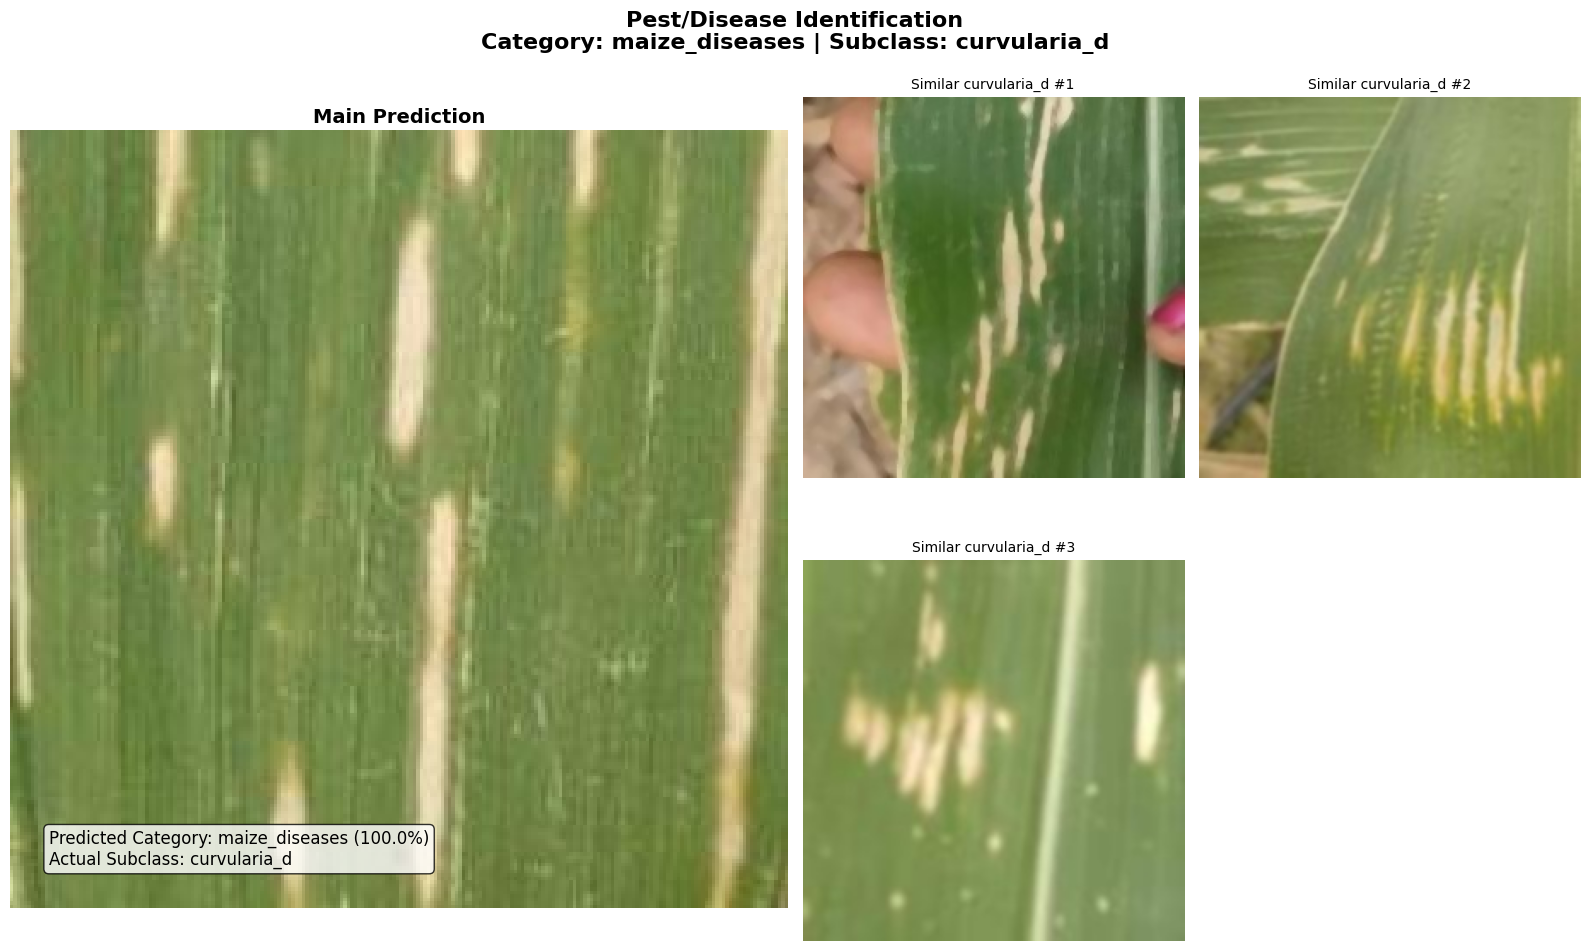

In [40]:
# Step 1: Set up the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Assume 'model' is your loaded PyTorch CNN model
# Example: model = torch.load('your_model.pth')
# Make sure your model is in evaluation mode
# if model is not None:
#     model.eval()

# Step 2: Map the directory structure to understand category-subclass relationships
def map_category_to_subclasses():
    """
    Create a mapping from main categories to their subclasses
    """
    base_path = Path('/content/processed_dataset')
    categories = {}
    category_list = sorted(os.listdir(base_path / 'train' / 'CATEGORY_A'))
    category_to_idx = {name: idx for idx, name in enumerate(category_list)}

    for category in category_list:
        subclasses = []
        category_path = base_path / 'train' / 'CATEGORY_A' / category
        if category_path.is_dir():
            for subclass_path in sorted(category_path.glob('*')):
                if subclass_path.is_dir():
                    subclasses.append(subclass_path.name)
        categories[category] = subclasses

    return category_list, categories

# Step 3: Function to predict both category and identify subclass
def predict_with_subclass(image_path, category_list, category_to_subclasses):
    """
    Make a prediction for the main category and then identify the specific subclass
    """
    path = Path(image_path)
    actual_category = path.parts[-3]
    actual_subclass = path.parts[-2]

    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0)

    predicted_category = "N/A"
    confidence = 0.0

    if 'model' in globals() and model is not None:
        with torch.no_grad():
            outputs = model(img_tensor)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            values, indices = torch.topk(probs, 1, dim=1)

            top_idx = indices[0][0].item()
            predicted_category = category_list[top_idx] if top_idx < len(category_list) else "unknown"
            confidence = values[0][0].item() * 100
    else:
        print("Warning: Model not loaded. Skipping prediction.")

    predicted_subclass = actual_subclass  # We know the subclass from the path
    similar_images = find_similar_images(image_path, predicted_category, actual_subclass)

    print(f"\nPrediction details for {path.name}:")
    print(f"Actual category: {actual_category}")
    print(f"Actual subclass: {actual_subclass}")
    print(f"Predicted category: {predicted_category} - {confidence:.2f}%")

    return image, predicted_category, actual_subclass, confidence, similar_images

# Step 4: Find similar images for visual comparison
def find_similar_images(image_path, category, subclass, num_images=3):
    """
    Find other images from the same subclass for comparison
    """
    base_path = Path('/content/processed_dataset')
    similar_images = []
    for split in ['train', 'test']:
        subclass_path = base_path / split / 'CATEGORY_A' / category / subclass
        if subclass_path.exists() and subclass_path.is_dir():
            current_image = Path(image_path).name
            other_images = [str(p) for p in subclass_path.glob('*.[jJ][pP]*[gG]') if p.name != current_image]
            other_images.extend([str(p) for p in subclass_path.glob('*.[pP][nN][gG]') if p.name != current_image])
            if other_images:
                selected = random.sample(other_images, min(num_images, len(other_images)))
                similar_images.extend(selected)
    return similar_images[:num_images]

# Step 5: Display function with improved visualization
def display_prediction_with_subclass(image, predicted_category, actual_subclass, confidence, similar_images=None):
    """
    Display the prediction with both category and subclass information
    """
    if similar_images:
        fig = plt.figure(figsize=(16, 10))
        ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
        ax1.imshow(image)
        ax1.set_title("Main Prediction", fontsize=14, fontweight='bold')
        ax1.axis('off')

        textstr = (f"Predicted Category: {predicted_category} ({confidence:.1f}%)\n"
                  f"Actual Subclass: {actual_subclass}")
        props = dict(boxstyle='round', facecolor='white', alpha=0.8)
        ax1.text(0.05, 0.05, textstr, transform=ax1.transAxes, fontsize=12,
                verticalalignment='bottom', bbox=props)

        for i, img_path in enumerate(similar_images):
            ax = plt.subplot2grid((2, 4), (i // 2, 2 + (i % 2)))
            comp_img = Image.open(img_path).convert("RGB")
            ax.imshow(comp_img)
            ax.set_title(f"Similar {actual_subclass} #{i+1}", fontsize=10)
            ax.axis('off')

        plt.suptitle(f"Pest/Disease Identification\nCategory: {predicted_category} | Subclass: {actual_subclass}",
                    fontsize=16, fontweight='bold')
    else:
        plt.figure(figsize=(10, 8))
        plt.imshow(image)
        plt.title(f"Pest/Disease Identification\nCategory: {predicted_category} ({confidence:.1f}%)\nSubclass: {actual_subclass}",
                 fontsize=14, fontweight='bold')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Step 6: Function to make multiple predictions
def predict_multiple_images(num_samples=4):
    """
    Make predictions on multiple random images
    """
    base_path = Path('/content/processed_dataset')
    category_list, category_to_subclasses = map_category_to_subclasses()

    all_image_paths = []
    for category in category_list:
        category_path = base_path / 'test' / 'CATEGORY_A' / category
        if category_path.is_dir():
            for subclass_path in category_path.glob('*'):
                if subclass_path.is_dir():
                    image_paths = list(subclass_path.glob('*.[jJ][pP]*[gG]'))
                    image_paths.extend(list(subclass_path.glob('*.[pP][nN][gG]')))
                    if image_paths:
                        all_image_paths.append(str(random.choice(image_paths)))

    if len(all_image_paths) > num_samples:
        selected_images = random.sample(all_image_paths, num_samples)
    else:
        selected_images = all_image_paths

    results = []
    for img_path in selected_images:
        image, pred_category, actual_subclass, confidence, similar_images = predict_with_subclass(
            img_path, category_list, category_to_subclasses)
        results.append((img_path, image, pred_category, actual_subclass, confidence))

    fig, axes = plt.subplots(2, len(results)//2 + (len(results) % 2), figsize=(15, 10))
    axes = axes.flatten()

    for i, (img_path, image, pred_category, actual_subclass, confidence) in enumerate(results):
        if i < len(axes):
            axes[i].imshow(image)
            axes[i].set_title(f"Category: {pred_category}\nSubclass: {actual_subclass}", fontsize=10)
            axes[i].axis('off')
            axes[i].text(0.5, -0.1, f"{confidence:.1f}%", ha='center', transform=axes[i].transAxes)

    for i in range(len(results), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle("Multiple Pest/Disease Predictions", fontsize=16, fontweight='bold')
    plt.subplots_adjust(top=0.9)
    plt.show()

# Step 7: Main execution
def main():
    # Load class mappings (we still need this to map predictions)
    category_list, category_to_subclasses = map_category_to_subclasses()

    # Option 1: Single image prediction
    specific_image = "/content/processed_dataset/test/CATEGORY_A/maize_diseases/curvularia_d/1373081601_1680541072593_640x480.jpg"

    # Make prediction with subclass identification
    image, predicted_category, actual_subclass, confidence, similar_images = predict_with_subclass(
        specific_image, category_list, category_to_subclasses)

    # Display result with similar images for comparison
    display_prediction_with_subclass(image, predicted_category, actual_subclass, confidence, similar_images)

    # Option 2: For multiple images (uncomment to use)
    # predict_multiple_images(4)  # Show 4 random samples

# Run the main function
if __name__ == "__main__":
    main()

In [43]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, recall_score
import pandas as pd
from tqdm import tqdm

# Assume you have your loaded model, test dataset, and know your class names
# model = torch.load('your_trained_model.pth')
# test_dataset = YourTestDataset(...)
# test_loader = DataLoader(test_dataset, batch_size=...)
# class_names = [...] # List of your category names

if 'model' not in globals():
    print("Warning: Model not loaded. Cannot evaluate.")
else:
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Evaluating"):
            # Move inputs and labels to the device your model is on
            device = next(model.parameters()).device
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate Accuracy and F1 Score
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted') # Use 'weighted' for multi-class
    recall = recall_score(all_labels, all_preds, average='weighted')


    # Organize the metrics into a pandas DataFrame
    performance_data = {'Metric': ['Accuracy', 'F1 Score', 'Recall'],
                        'Value': [accuracy, f1, recall]}
    performance_df = pd.DataFrame(performance_data)

    print("\nModel Performance:")
    print(performance_df.to_string(index=False))

Evaluating: 100%|██████████| 173/173 [05:58<00:00,  2.07s/it]


Model Performance:
  Metric    Value
Accuracy 0.886158
F1 Score 0.883270
  Recall 0.886158
